In [ ]:
!pip install pyupbit

     |████████████████████████████████| 103 kB 7.1 MB/s 


In [ ]:
import time
import pyupbit
import datetime

In [ ]:
access = "key"
secret = "key"

In [ ]:
def get_target_price(ticker, k):
    """변동성 돌파 전략으로 매수 목표가 조회"""
    df = pyupbit.get_ohlcv(ticker, interval="day", count=2)
    target_price = df.iloc[0]['close'] + (df.iloc[0]['high'] - df.iloc[0]['low']) * k
    return target_price

def get_start_time(ticker):
    """시작 시간 조회"""
    df = pyupbit.get_ohlcv(ticker, interval="day", count=1)
    start_time = df.index[0]
    return start_time

def get_ma15(ticker):
    """15일 이동 평균선 조회"""
    df = pyupbit.get_ohlcv(ticker, interval="day", count=15)
    ma15 = df['close'].rolling(15).mean().iloc[-1]
    return ma15

def get_balance(ticker):
    """잔고 조회"""
    balances = upbit.get_balances()
    for b in balances:
        if b['currency'] == ticker:
            if b['balance'] is not None:
                return float(b['balance'])
            else:
                return 0
    return 0

def get_current_price(ticker):
    """현재가 조회"""
    return pyupbit.get_orderbook(ticker=ticker)["orderbook_units"][0]["ask_price"]

In [ ]:
# 로그인
upbit = pyupbit.Upbit(access, secret)

In [ ]:
ticker = "KRW-BTC"
df = pyupbit.get_ohlcv(ticker, interval="day", count=3650)

In [ ]:
df.head()

,open,high,low,close,volume,value
2017-09-25 09:00:00,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08
2017-09-26 09:00:00,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07
2017-09-27 09:00:00,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08
2017-09-28 09:00:00,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08
2017-09-29 09:00:00,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08


In [ ]:
df["open_diff"] = df["open"] - df["open"].shift(1)
df["high_diff"] = df["high"] - df["high"].shift(1)
df["low_diff"] = df["low"] - df["low"].shift(1)
df["close_diff"] = df["close"] - df["close"].shift(1)

In [ ]:
df.head()

,open,high,low,close,volume,value,open_diff,high_diff,low_diff,close_diff
2017-09-25 09:00:00,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,5.602146e+08,NaN,NaN,NaN,NaN
2017-09-26 09:00:00,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,9.950724e+07,116000.0,85000.0,136000.0,-1000.0
2017-09-27 09:00:00,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.448276e+08,5000.0,259000.0,7000.0,336000.0
2017-09-28 09:00:00,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,3.721860e+08,335000.0,95000.0,201000.0,-71000.0
2017-09-29 09:00:00,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,2.724558e+08,-71000.0,-63000.0,-43000.0,71000.0


In [ ]:
df2 = df[["open_diff", "high_diff", "low_diff", "close_diff", "volume", "close"]]
df2.head()

,open_diff,high_diff,low_diff,close_diff,volume,close
2017-09-25 09:00:00,NaN,NaN,NaN,NaN,132.484755,4322000.0
2017-09-26 09:00:00,116000.0,85000.0,136000.0,-1000.0,22.788340,4321000.0
2017-09-27 09:00:00,5000.0,259000.0,7000.0,336000.0,32.269662,4657000.0
2017-09-28 09:00:00,335000.0,95000.0,201000.0,-71000.0,80.588243,4586000.0
2017-09-29 09:00:00,-71000.0,-63000.0,-43000.0,71000.0,59.352373,4657000.0


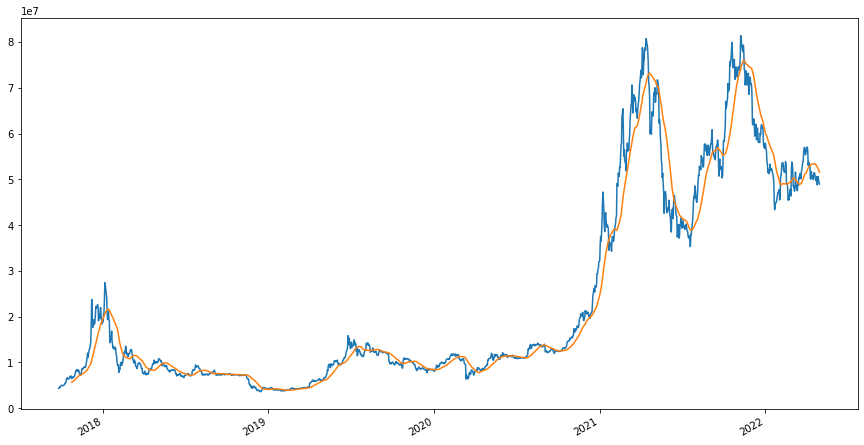

In [ ]:
df2["close"].plot(figsize=(15, 8))
df2["close"].rolling(window=30).mean().plot()

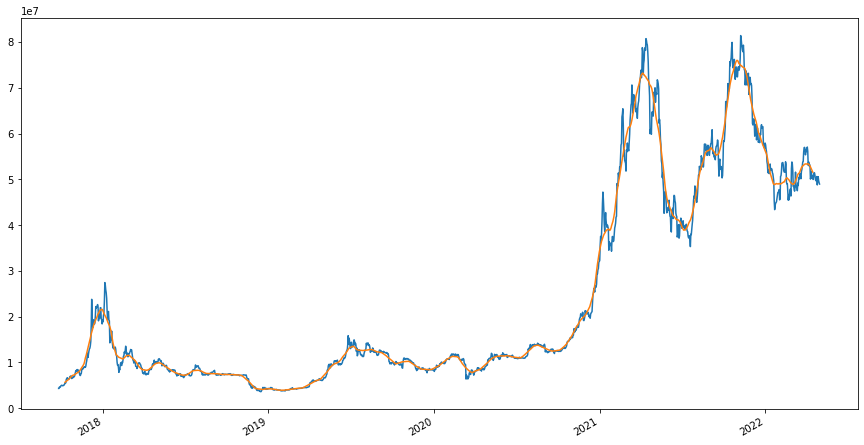

In [ ]:
df2["close"].plot(figsize=(15, 8))
df2["close"].rolling(window=30).mean().shift(-15).plot()

In [ ]:
df2["close_MA30"] = df2["close"].rolling(window=30).mean()
df2.head(40)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,open_diff,high_diff,low_diff,close_diff,volume,close,close_MA30
2017-09-25 09:00:00,NaN,NaN,NaN,NaN,132.484755,4322000.0,NaN
2017-09-26 09:00:00,116000.0,85000.0,136000.0,-1000.0,22.788340,4321000.0,NaN
2017-09-27 09:00:00,5000.0,259000.0,7000.0,336000.0,32.269662,4657000.0,NaN
2017-09-28 09:00:00,335000.0,95000.0,201000.0,-71000.0,80.588243,4586000.0,NaN
2017-09-29 09:00:00,-71000.0,-63000.0,-43000.0,71000.0,59.352373,4657000.0,NaN
2017-09-30 09:00:00,71000.0,187000.0,175000.0,238000.0,19.998483,4895000.0,NaN
2017-10-01 09:00:00,232000.0,82000.0,31000.0,67000.0,27.323332,4962000.0,NaN
2017-10-02 09:00:00,73000.0,117000.0,274000.0,63000.0,31.728004,5025000.0,NaN
2017-10-03 09:00:00,59000.0,-16000.0,-145000.0,-61000.0,11.899307,4964000.0,NaN
2017-10-04 09:00:00,-34000.0,-77000.0,26000.0,-69000.0,7.038744,4895000.0,NaN


In [ ]:
df2["close_MA30"] = df2["close"].rolling(window=30).mean().shift(-15)
df2.head(40)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,open_diff,high_diff,low_diff,close_diff,volume,close,close_MA30
2017-09-25 09:00:00,NaN,NaN,NaN,NaN,132.484755,4322000.0,NaN
2017-09-26 09:00:00,116000.0,85000.0,136000.0,-1000.0,22.788340,4321000.0,NaN
2017-09-27 09:00:00,5000.0,259000.0,7000.0,336000.0,32.269662,4657000.0,NaN
2017-09-28 09:00:00,335000.0,95000.0,201000.0,-71000.0,80.588243,4586000.0,NaN
2017-09-29 09:00:00,-71000.0,-63000.0,-43000.0,71000.0,59.352373,4657000.0,NaN
2017-09-30 09:00:00,71000.0,187000.0,175000.0,238000.0,19.998483,4895000.0,NaN
2017-10-01 09:00:00,232000.0,82000.0,31000.0,67000.0,27.323332,4962000.0,NaN
2017-10-02 09:00:00,73000.0,117000.0,274000.0,63000.0,31.728004,5025000.0,NaN
2017-10-03 09:00:00,59000.0,-16000.0,-145000.0,-61000.0,11.899307,4964000.0,NaN
2017-10-04 09:00:00,-34000.0,-77000.0,26000.0,-69000.0,7.038744,4895000.0,NaN


In [ ]:
df2.tail(40)

,open_diff,high_diff,low_diff,close_diff,volume,close,close_MA30
2022-03-23 09:00:00,1561000.0,-164000.0,1105000.0,434000.0,5293.402954,52138000.0,5.270537e+07
2022-03-24 09:00:00,449000.0,1184000.0,682000.0,828000.0,7289.941854,52966000.0,5.275083e+07
2022-03-25 09:00:00,769000.0,1034000.0,900000.0,825000.0,5670.827515,53791000.0,5.289553e+07
2022-03-26 09:00:00,929000.0,-209000.0,702000.0,111000.0,3333.058744,53902000.0,5.304567e+07
2022-03-27 09:00:00,52000.0,1960000.0,272000.0,2047000.0,5341.023716,55949000.0,5.309733e+07
2022-03-28 09:00:00,2048000.0,1477000.0,2153000.0,965000.0,6374.435146,56914000.0,5.319957e+07
2022-03-29 09:00:00,964000.0,-138000.0,563000.0,71000.0,6629.178471,56985000.0,5.328387e+07
2022-03-30 09:00:00,85000.0,-440000.0,-375000.0,-365000.0,4136.114493,56620000.0,5.333737e+07
2022-03-31 09:00:00,-391000.0,127000.0,-785000.0,-1268000.0,5141.563266,55352000.0,5.335273e+07
2022-04-01 09:00:00,-1263000.0,-437000.0,-984000.0,1017000.0,6752.645356,56369000.0,5.336933e+07


In [ ]:
df2["close_diff_ma10"] = df2["close_diff"].rolling(window=10).mean().shift(-5)
df2["close_diff_ma20"] = df2["close_diff"].rolling(window=20).mean().shift(-10)
df2["close_diff_ma60"] = df2["close_diff"].rolling(window=60).mean().shift(-30)
df2["close_diff_ma120"] = df2["close_diff"].rolling(window=120).mean().shift(-60)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df = df2[["close_diff_ma10", "close_diff_ma20", "close_diff_ma60", "close_diff_ma120", "close"]]
df

,close_diff_ma10,close_diff_ma20,close_diff_ma60,close_diff_ma120,close
2017-09-25 09:00:00,NaN,NaN,NaN,NaN,4322000.0
2017-09-26 09:00:00,NaN,NaN,NaN,NaN,4321000.0
2017-09-27 09:00:00,NaN,NaN,NaN,NaN,4657000.0
2017-09-28 09:00:00,NaN,NaN,NaN,NaN,4586000.0
2017-09-29 09:00:00,NaN,NaN,NaN,NaN,4657000.0
...,...,...,...,...,...
2022-04-27 09:00:00,NaN,NaN,NaN,NaN,49954000.0
2022-04-28 09:00:00,NaN,NaN,NaN,NaN,50580000.0
2022-04-29 09:00:00,NaN,NaN,NaN,NaN,49731000.0
2022-04-30 09:00:00,NaN,NaN,NaN,NaN,49283000.0


In [ ]:
df = df.dropna()
df.head()

,close_diff_ma10,close_diff_ma20,close_diff_ma60,close_diff_ma120,close
2017-11-24 09:00:00,233400.0,304650.0,215816.666667,73491.666667,9195000.0
2017-11-25 09:00:00,291000.0,314750.0,216850.000000,76075.000000,9879000.0
2017-11-26 09:00:00,358800.0,484000.0,253716.666667,69300.000000,10344000.0
2017-11-27 09:00:00,388700.0,762500.0,254250.000000,69083.333333,11314000.0
2017-11-28 09:00:00,418500.0,582100.0,210066.666667,68691.666667,12048000.0


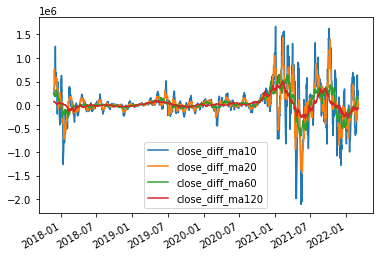

In [ ]:
df[["close_diff_ma10", "close_diff_ma20", "close_diff_ma60", "close_diff_ma120"]].plot.line()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ["close_diff_ma10", "close_diff_ma20", "close_diff_ma60", "close_diff_ma120", "close"]
# 스케일 후 columns
scaled = scaler.fit_transform(df[scale_cols])

In [ ]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('close', 1), df['close'], test_size=0.2, random_state=0, shuffle=False)

In [ ]:
x_train.shape, y_train.shape

((1248, 4), (1248,))

In [ ]:
x_test.shape, y_test.shape

((312, 4), (312,))

In [ ]:
x_train

,close_diff_ma10,close_diff_ma20,close_diff_ma60,close_diff_ma120
0,0.619930,0.605908,0.667003,0.455352
1,0.635150,0.609414,0.667794,0.458664
2,0.653067,0.668165,0.696029,0.449978
3,0.660968,0.764840,0.696437,0.449700
4,0.668842,0.702218,0.662599,0.449198
...,...,...,...,...
1243,0.034749,0.316336,0.300040,0.130772
1244,0.157836,0.331904,0.302427,0.121712
1245,0.211083,0.331349,0.271983,0.061721
1246,0.253230,0.313750,0.218450,0.105141


TensorFlow Dataset을 활용한 시퀀스 데이터셋 구성

In [ ]:
import tensorflow as tf

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
WINDOW_SIZE=20
BATCH_SIZE=32

In [ ]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [ ]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [ ]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [ ]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [ ]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
     39/Unknown - 4s 12ms/step - loss: 0.0065 - mse: 0.0129
Epoch 1: val_loss improved from inf to 0.00635, saving model to tmp/ckeckpointer.ckpt
39/39 [==============================] - 5s 42ms/step - loss: 0.0065 - mse: 0.0129 - val_loss: 0.0063 - val_mse: 0.0127
Epoch 2/50
35/39 [=========================>....] - ETA: 0s - loss: 7.1329e-04 - mse: 0.0014
Epoch 2: val_loss improved from 0.00635 to 0.00345, saving model to tmp/ckeckpointer.ckpt
39/39 [==============================] - 1s 16ms/step - loss: 6.7457e-04 - mse: 0.0013 - val_loss: 0.0034 - val_mse: 0.0069
Epoch 3/50
35/39 [=========================>....] - ETA: 0s - loss: 3.7940e-04 - mse: 7.5879e-04
Epoch 3: val_loss improved from 0.00345 to 0.00237, saving model to tmp/ckeckpointer.ckpt
39/39 [==============================] - 1s 18ms/step - loss: 3.7662e-04 - mse: 7.5324e-04 - val_loss: 0.0024 - val_mse: 0.0047
Epoch 4/50
37/39 [===========================>..] - ETA: 0s - loss: 3.5776e-04 - mse: 7.1553e-04
Epoc

In [ ]:
model.load_weights(filename)

In [ ]:
pred = model.predict(test_data)

In [ ]:
pred.shape

(292, 1)

예측 데이터 시각화


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


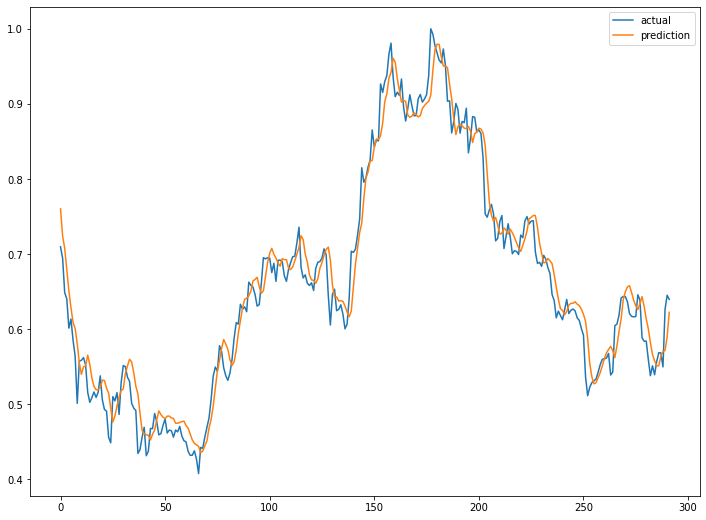

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()